# Definición una variable objetivo para un modelo predictivo de ML
El modelo predictivo puede ser de dos tipos:
* __Modelo de regresión__: Se puede utilizar el primer bloque de <span style="color:BLUE">__CAMBIOS CONDUCTUALES__</span> para obtener un score de valor discreto. Por ejemplo, el valor para un individuo puede variar entre -18 y 18 (dado que hay 9 preguntas y cada una puede tener un valor entre -2 y 2). Este enfoque permitiría predecir el score exacto de cambios conductuales basado en las características de entrada.
* __Modelo de clasificación__:  Si, en lugar de eso, se agrupa el score total en categorías (por ejemplo, <span style="color:red">__cambio bajo__</span>, <span style="color:red">__cambio medio__</span> y <span style="color:red">__cambio alto__</span>), entonces se debe usar un modelo de clasificación. Esta opción permite categorizar a los individuos en diferentes niveles de cambios conductuales, pero se no obtendría una predicción numérica precisa del score de cambio conductual.

Ambos enfoques tienen sus ventajas:

* La regresión proporciona predicciones más granulares y puede ser útil si se desea entender las diferencias sutiles entre los individuos.
* La clasificación simplifica el problema y puede ser más fácil de interpretar y comunicar a un público no técnico. Además, puede ser útil si el objetivo es identificar grupos específicos de personas para intervenciones o políticas específicas.

Para definir los valores de "cambio bajo", "cambio medio" y "cambio alto" en una tarea de clasificación, existen varias opciones:
1. __Percentiles__: Usar los percentiles del score total para segmentar a la población. Por ejemplo, decir que el 33% de las personas con los scores más bajos caen en la categoría "cambio bajo", el siguiente 33% en "cambio medio", y el 33% restante en "cambio alto".

1. __Intervalos fijos__: Dado que el score total puede variar de -18 (todos los aspectos mucho peor) a 18 (todos los aspectos mucho mejor), se puede dividir este rango en tres partes iguales. Por ejemplo:

   * -18 a -6: cambio bajo
   * -6 a 6: cambio medio
   * 6 a 18: cambio alto
   

3. __Análisis de Clúster__: Utilizar K-means en los scores totales para identificar los tres clústers naturales en los datos. Posteriormente se etiquetan estos clústers según su score promedio como bajo, medio o alto.

## Categorización basada en percentiles
Esta técnica permite segmentar los datos en grupos basados en su distribución. 
Procedimiento
1. __Calcular el score total para cada individuo__: sumar las respuestas de las 9 preguntas para obtener un score total.
1. __Ordenar los scores__: ordenar estos scores de menor a mayor.
1. __Determinar los percentiles__:
   * El percentil 33 representa el valor por debajo del cual cae el 33% de los datos.
   * El percentil 66 representa el valor por debajo del cual cae el 66% de los datos.
Estos dos valores permitirán dividir los datos en tres grupos de tamaño aproximadamente igual.

1. __Asignar categorías basadas en los percentiles__:

   * Los individuos con scores hasta el percentil 33 se categorizan como <span style="color:red">__cambio bajo__</span>.
   * Los individuos con scores entre el percentil 33 y el 66 se categorizan como <span style="color:red">__cambio medio__</span>.
   *Los individuos con scores por encima del percentil 66 se categorizan como <span style="color:red">__cambio alto__</span>.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el dataset parcial bloques 1 y 2
df = pd.read_csv("conductual_crecimiento.csv")

# Mostrar las primeras filas del dataset para entender su estructura
df.head()

,Life_Change_1,Life_Change_2,Life_Change_3,Life_Change_4,Life_Change_5,Life_Change_6,Life_Change_7,Life_Change_8,Life_Change_9,Growth_1,Growth_2,Growth_3,Growth_4,Growth_5
0,-2.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,3.0,3.0,3.0,2.0,3.0
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0
2,-1.0,0.0,2.0,0.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,2.0,2.0,3.0,3.0
3,2.0,0.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,3.0
4,0.0,-1.0,2.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,3.0,3.0


In [2]:
# Identificamos el número de missing values en cada columna
df.isnull().sum()

Life_Change_1       0
Life_Change_2       0
Life_Change_3       0
Life_Change_4       0
Life_Change_5       0
Life_Change_6       0
Life_Change_7       1
Life_Change_8       0
Life_Change_9       0
Growth_1            0
Growth_2            0
Growth_3         1185
Growth_4            0
Growth_5            0
dtype: int64

In [3]:
# Imputar valores faltantes con la mediana
for column in df.columns:
    df[column].fillna(df[column].median(), inplace=True)

In [4]:
# Identificamos el número de missing values en cada columna
df.isnull().sum()

Life_Change_1    0
Life_Change_2    0
Life_Change_3    0
Life_Change_4    0
Life_Change_5    0
Life_Change_6    0
Life_Change_7    0
Life_Change_8    0
Life_Change_9    0
Growth_1         0
Growth_2         0
Growth_3         0
Growth_4         0
Growth_5         0
dtype: int64

In [5]:
#almacenar csv sin missing values
df.to_csv('conductual_crecimiento_OK.csv', index=False)

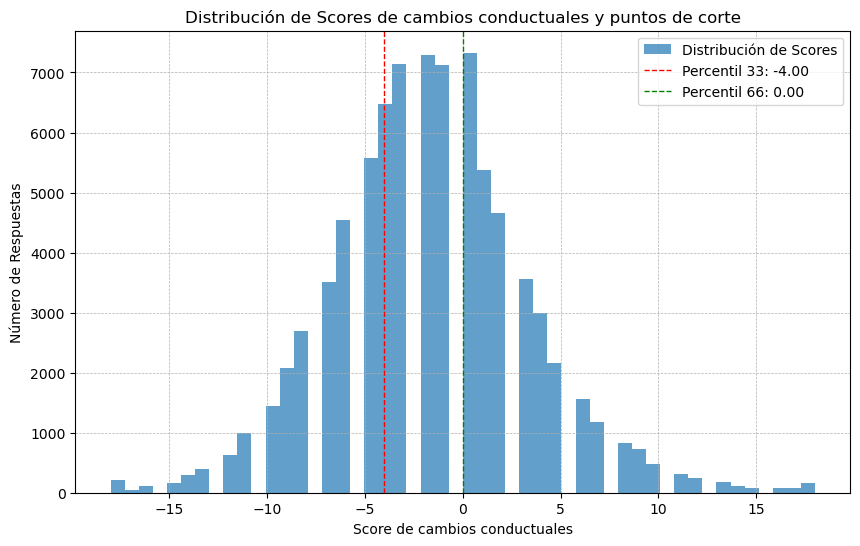

In [6]:
# Calcular el score total para cada individuo
df['total_score'] = df[['Life_Change_1', 'Life_Change_2', 'Life_Change_3', 'Life_Change_4', 'Life_Change_5', 
                            'Life_Change_6', 'Life_Change_7', 'Life_Change_8', 'Life_Change_9']].sum(axis=1)

# Determinar los percentiles 33 y 66
percentile_33 = np.percentile(df['total_score'], 33)
percentile_66 = np.percentile(df['total_score'], 66)

# Asignar categorías basadas en los percentiles
df['label_change'] = pd.cut(df['total_score'], bins=[-np.inf, percentile_33, percentile_66, np.inf], labels=['low', 'medium', 'high'])

# Visualizar la distribución de los scores y los puntos de corte
plt.figure(figsize=(10, 6))
plt.hist(df['total_score'], bins=50, alpha=0.7, label='Distribución de Scores')
plt.axvline(percentile_33, color='r', linestyle='dashed', linewidth=1, label=f'Percentil 33: {percentile_33:.2f}')
plt.axvline(percentile_66, color='g', linestyle='dashed', linewidth=1, label=f'Percentil 66: {percentile_66:.2f}')
plt.title('Distribución de Scores de cambios conductuales y puntos de corte')
plt.xlabel('Score de cambios conductuales')
plt.ylabel('Número de Respuestas')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [7]:
# Contar la cantidad de individuos en cada categoría
counts = df['label_change'].value_counts().sort_index()
counts

label_change
low       29163
medium    28875
high      24738
Name: count, dtype: int64

In [8]:
df.head()

,Life_Change_1,Life_Change_2,Life_Change_3,Life_Change_4,Life_Change_5,Life_Change_6,Life_Change_7,Life_Change_8,Life_Change_9,Growth_1,Growth_2,Growth_3,Growth_4,Growth_5,total_score,label_change
0,-2.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,3.0,3.0,3.0,2.0,3.0,2.0,high
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,18.0,high
2,-1.0,0.0,2.0,0.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,2.0,2.0,3.0,3.0,0.0,medium
3,2.0,0.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,3.0,10.0,high
4,0.0,-1.0,2.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,3.0,3.0,7.0,high


## Prueba de gaussianidad
Una de las pruebas más comunes para evaluar la normalidad de una distribución es la Prueba de Shapiro-Wilk.

Implementar la Prueba de Shapiro-Wilk para evaluar la normalidad de la distribución de los total_score en tu dataframe:

* __Hipótesis nula__, $H_0$: La muestra tiene una distribución gaussiana. 
* __Hipótesis alternativa__, $H_1$: La muestra no tiene una distribución gaussiana. Si el valor $p$ es menor que un nivel de significancia predefinido (por ejemplo, $0.05$), entonces se rechaza la hipótesis nula en favor de la hipótesis alternativa.

In [9]:
from scipy.stats import shapiro

# Selecciona una muestra aleatoria de 5,000 registros de 'total_score'
sample_data = df['total_score'].sample(n=5000, random_state=42)

# Realiza la prueba de Shapiro-Wilk
stat, p = shapiro(sample_data)

print(f'Estadístico de Shapiro-Wilk: {stat:.3f}')
print(f'Valor p: {p:.3f}')

# Interpreta el resultado
alpha = 0.05
if p > alpha:
    print('La muestra parece seguir una distribución normal (no se rechaza H0)')
else:
    print('La muestra no parece seguir una distribución normal (se rechaza H0)')


Estadístico de Shapiro-Wilk: 0.989
Valor p: 0.000
La muestra no parece seguir una distribución normal (se rechaza H0)


Estadístico de Shapiro-Wilk: 0.989

### Q-Qplot
El Q-Q Plot (Quantile-Quantile Plot) es una herramienta gráfica que compara la distribución de los datos con una distribución teórica, en este caso, la distribución normal. Si los datos fueran perfectamente normales, los puntos en el gráfico se alinearían exactamente a lo largo de la línea diagonal (la línea de 45 grados).


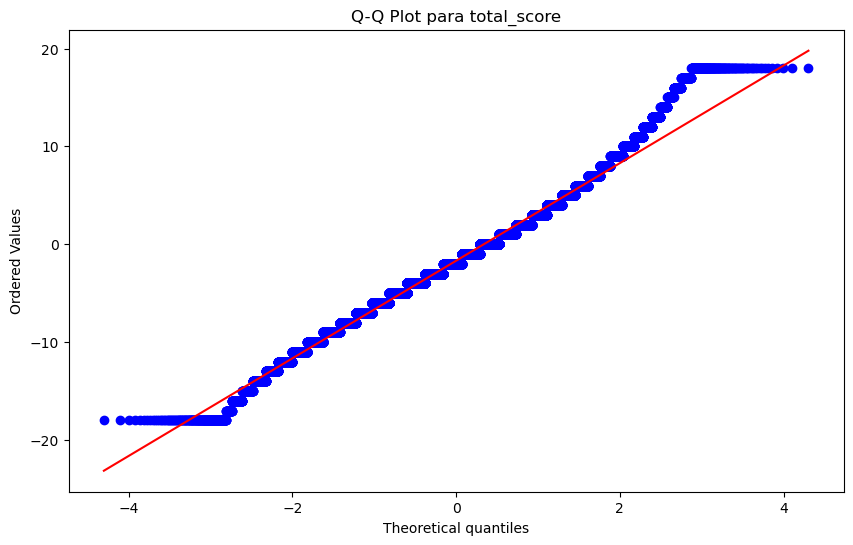

In [11]:
from scipy import stats

# Generar Q-Q plot para 'total_score'
plt.figure(figsize=(10, 6))
stats.probplot(df['total_score'], dist="norm", plot=plt)
plt.title('Q-Q Plot para total_score')
plt.show()


En este caso, se concluye los siguinte:
* __Medio del gráfico__: La mayoría de los puntos en el centro del gráfico parecen estar bastante cerca de la línea diagonal, lo que indica que esta parte de tus datos se ajusta bien a una distribución normal.

* __Extremos del gráfico__: Sin embargo, en los extremos (tanto en la parte inferior izquierda como en la parte superior derecha), los puntos se desvían de la línea diagonal. Estas desviaciones en los extremos indican que los datos tienen colas más pesadas o más ligeras que una distribución normal, lo que es una señal de que no se ajustan perfectamente a la normalidad en esos rangos.

Nota:  la parte central de los datos se asemeja a una distribución normal, las colas no lo hacen.

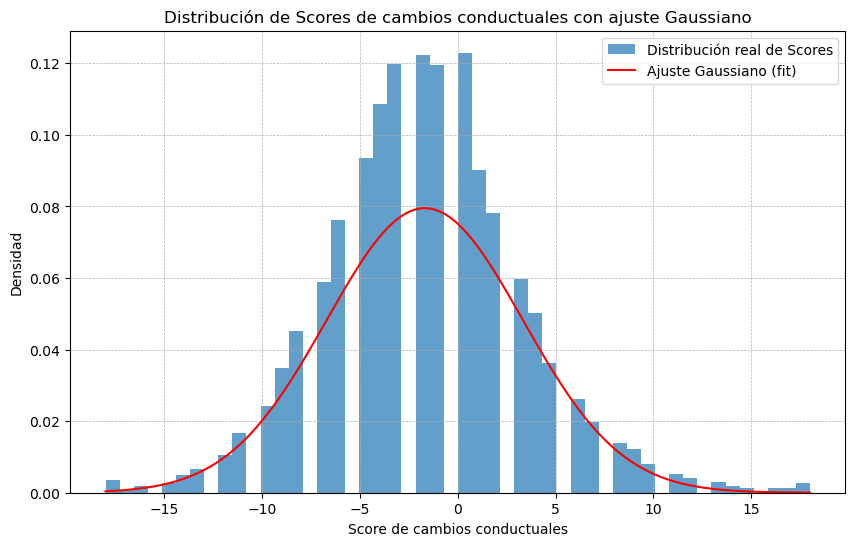

In [12]:
# Calculamos nuevamente el total_score
df['total_score'] = df[['Life_Change_1', 'Life_Change_2', 'Life_Change_3', 'Life_Change_4', 
                        'Life_Change_5', 'Life_Change_6', 'Life_Change_7', 'Life_Change_8', 
                        'Life_Change_9']].sum(axis=1)

# Ajustar una distribución normal y obtener los parámetros mu y sigma
mu_fit, sigma_fit = stats.norm.fit(df['total_score'])

# Crear una serie de puntos para evaluar la función de densidad de probabilidad
x = np.linspace(df['total_score'].min(), df['total_score'].max(), 1000)
pdf_gaussian_fit = stats.norm.pdf(x, mu_fit, sigma_fit)

# Visualizar
plt.figure(figsize=(10, 6))
plt.hist(df['total_score'], bins=50, density=True, alpha=0.7, label='Distribución real de Scores')
plt.plot(x, pdf_gaussian_fit, 'r-', label='Ajuste Gaussiano (fit)')
plt.title('Distribución de Scores de cambios conductuales con ajuste Gaussiano')
plt.xlabel('Score de cambios conductuales')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [13]:
# Exportar la columna 'total_score' a un archivo CSV
df['total_score'].to_csv('total_scores.csv', index=False)

C:\Users\pvelarde\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


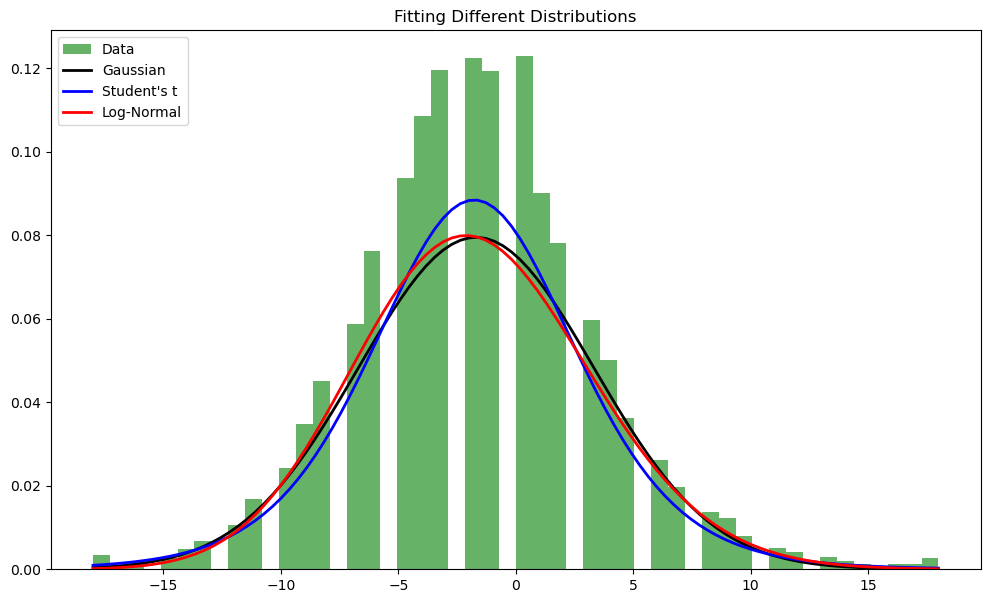

In [14]:
from scipy.stats import norm, t, lognorm
scores = df['total_score'].values

# Parámetros para la distribución gaussiana
mu, std = norm.fit(scores)

# Parámetros para la distribución t de Student
df_t, loc_t, scale_t = t.fit(scores)

# Parámetros para la distribución log-normal
shape_lognorm, loc_lognorm, scale_lognorm = lognorm.fit(scores)

# Rango de valores para x
xmin, xmax = scores.min(), scores.max()
x = np.linspace(xmin, xmax, 100)

# PDFs ajustadas
pdf_gaussian = norm.pdf(x, mu, std)
pdf_student = t.pdf(x, df_t, loc_t, scale_t)
pdf_lognorm = lognorm.pdf(x, shape_lognorm, loc_lognorm, scale_lognorm)

# Gráfica
plt.figure(figsize=(12, 7))
plt.hist(scores, bins=50, density=True, alpha=0.6, color='g', label="Data")
plt.plot(x, pdf_gaussian, 'k', linewidth=2, label="Gaussian")
plt.plot(x, pdf_student, 'b', linewidth=2, label="Student's t")
plt.plot(x, pdf_lognorm, 'r', linewidth=2, label="Log-Normal")
plt.title('Fitting Different Distributions')
plt.legend(loc='upper left')
plt.show()

## Categorización basada en clustering
El análisis de clúster es un método de aprendizaje no supervisado que tiene como objetivo dividir un conjunto de objetos en grupos o clústeres de manera que los objetos dentro de un mismo grupo sean más similares entre sí que con los objetos en otros clústers.

### K-means:
Es una de las técnicas más populares para el análisis de clúster. 

Funcionamiento:
1. __Inicialización__: Se elige un número $k$ que representa la cantidad de clústeres que se desea. Se seleccionan aleatoriamente $k$ puntos de los datos como los centroides iniciales de los clústeres.
1. __Asignación__: Cada punto de datos se asigna al centroide del clúster más cercano.
1. __Actualización__: Se recalcula el centroide de cada clúster como el promedio de todos los puntos asignados a ese clúster.
1. __Repetición__: Los pasos de "Asignación" y "Actualización" se repiten hasta que los centros de los clústeres ya no cambian significativamente.

Para este dataset se van a segmentar los individuos en tres grupos basado en sus cambios conductuales. Para ello se puede usar el score total de cada individuos y aplicar porteriormente k-means con un $k=3$ para identificar estos grupos.


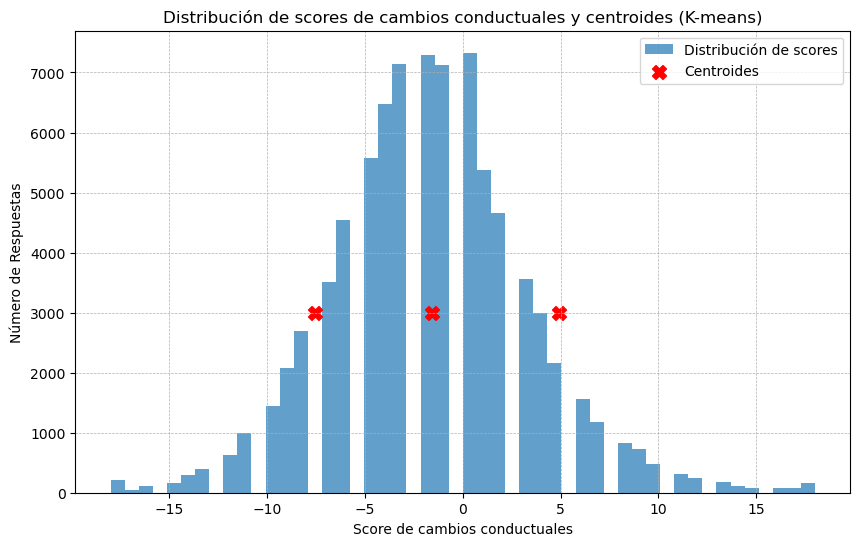

In [9]:
from sklearn.cluster import KMeans

# Reshape the data
X_score = df['total_score'].values.reshape(-1, 1)

# Aplicar K-means con k=3
kmeans_score = KMeans(n_clusters=3, random_state=42)
df['cluster_score_label'] = kmeans_score.fit_predict(X_score)

# Obtener los centros de los clústeres
cluster_centers_score = kmeans_score.cluster_centers_

# Visualizar la distribución de los scores y los centros de clúster
plt.figure(figsize=(10, 6))
plt.hist(df['total_score'], bins=50, alpha=0.7, label='Distribución de scores')
plt.scatter(cluster_centers_score, [3000] * len(cluster_centers_score), color='red', s=100, marker='X', label='Centroides')
plt.title('Distribución de scores de cambios conductuales y centroides (K-means)')
plt.xlabel('Score de cambios conductuales')
plt.ylabel('Número de Respuestas')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [10]:
# Crear un DataFrame para los valores de los centroides
cluster_centers_score_df = pd.DataFrame(cluster_centers_score, columns=['Centroide Score Total'])

# Mapear los clusters a las categorías "cambio bajo", "cambio medio" y "cambio alto" basados en los centroides
cluster_to_category_mapping = {
    cluster_centers_score_df['Centroide Score Total'].idxmin(): 'cambio bajo',
    cluster_centers_score_df['Centroide Score Total'].idxmax(): 'cambio alto'
}
middle_cluster = [cluster for cluster in df['cluster_score_label'].unique() if cluster not in cluster_to_category_mapping.keys()][0]
cluster_to_category_mapping[middle_cluster] = 'cambio medio'

# Construir el DataFrame de resumen
summary_df = pd.DataFrame({
    'Número de Cluster': range(3),
    'Valor del Centroide': cluster_centers_score.flatten(),
    'Tipo de Cambio': [cluster_to_category_mapping[i] for i in range(3)],
    'Cantidad de Individuos': df['cluster_score_label'].value_counts().sort_index().values
})

summary_df

,Número de Cluster,Valor del Centroide,Tipo de Cambio,Cantidad de Individuos
0,0,-7.537811,cambio bajo,22692
1,1,4.915423,cambio alto,19367
2,2,-1.562443,cambio medio,40717


In [11]:
df.head(10)

,Life_Change_1,Life_Change_2,Life_Change_3,Life_Change_4,Life_Change_5,Life_Change_6,Life_Change_7,Life_Change_8,Life_Change_9,Growth_1,Growth_2,Growth_3,Growth_4,Growth_5,total_score,label_change,cluster_score_label
0,-2.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,3.0,3.0,3.0,2.0,3.0,2.0,high,1
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,18.0,high,1
2,-1.0,0.0,2.0,0.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,2.0,2.0,3.0,3.0,0.0,medium,2
3,2.0,0.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,3.0,10.0,high,1
4,0.0,-1.0,2.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,3.0,3.0,7.0,high,1
5,0.0,-1.0,-1.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,high,1
6,-2.0,-2.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,-4.0,low,2
7,-2.0,-2.0,-2.0,-1.0,-2.0,-1.0,-2.0,-2.0,-2.0,1.0,1.0,1.0,1.0,1.0,-16.0,low,0
8,-1.0,-1.0,-1.0,-2.0,-1.0,-2.0,-1.0,0.0,-1.0,2.0,2.0,2.0,2.0,2.0,-10.0,low,0
9,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,3.0,3.0,3.0,-1.0,medium,2


## Análisis de los clústers
Analizar las respuestas promedio a las preguntas del primer bloque para cada clúster. Esto nos permitirá entender las tendencias específicas y características de los individuos en cada grupo. Se calcula la media de las respuestas de las preguntas `Life_Change_1` a `Life_Change_9` para cada clúster. Los resultados se muestran en una tabla y gráficamente para facilitar la interpretación.

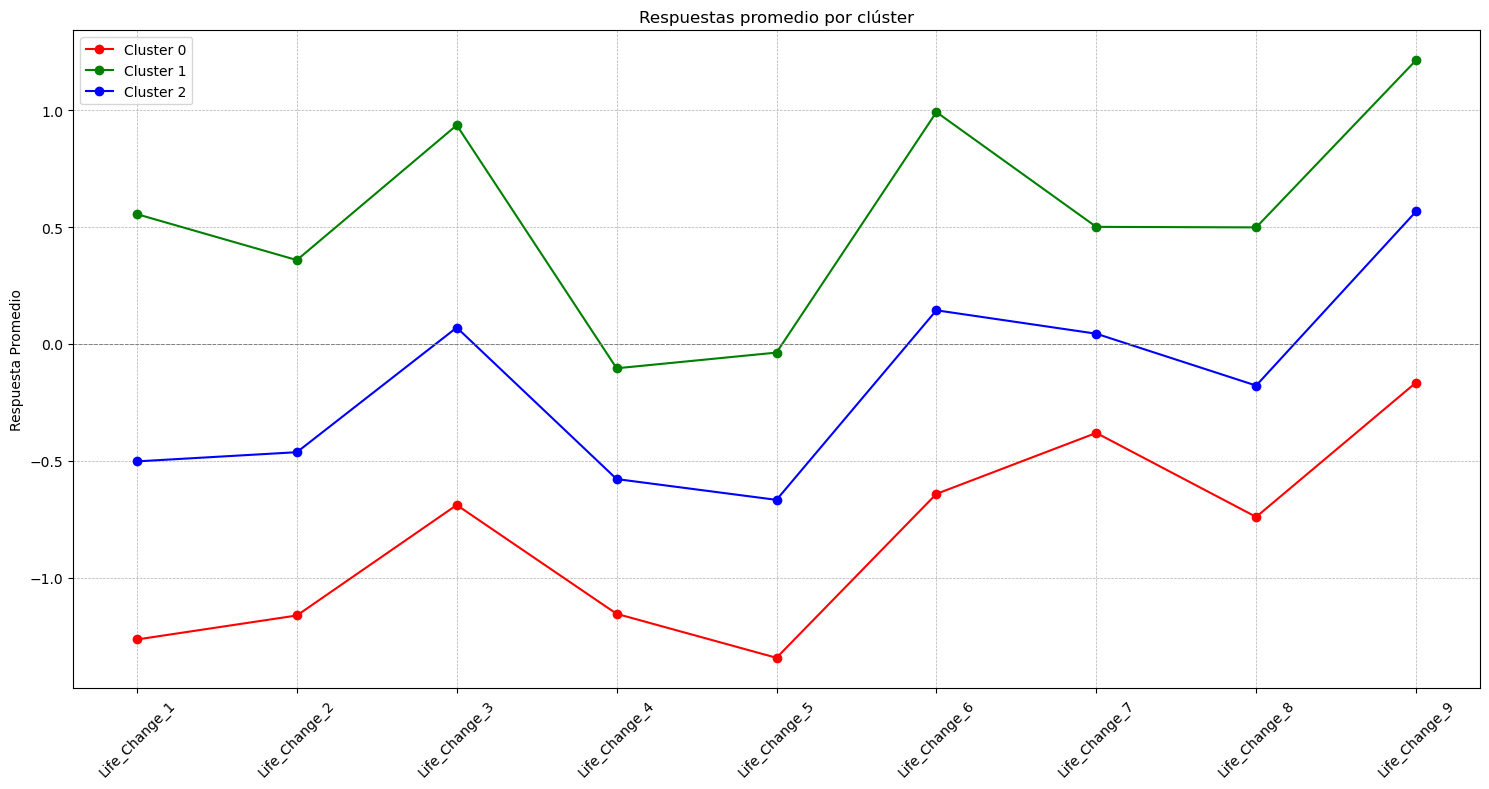

,Life_Change_1,Life_Change_2,Life_Change_3,Life_Change_4,Life_Change_5,Life_Change_6,Life_Change_7,Life_Change_8,Life_Change_9
cluster_score_label,,,,,,,,,
0,-1.264102,-1.161423,-0.688833,-1.154372,-1.342500,-0.641327,-0.380487,-0.739776,-0.164992
1,0.555378,0.358961,0.935974,-0.103940,-0.036764,0.991997,0.501059,0.498787,1.213972
2,-0.502223,-0.462902,0.070339,-0.577891,-0.666822,0.144141,0.043962,-0.177886,0.566839


In [13]:
# Calcular la media de las respuestas de las preguntas del primer bloque para cada clúster
cluster_means = df.groupby('cluster_score_label')[['Life_Change_1', 'Life_Change_2', 'Life_Change_3', 'Life_Change_4', 
                                         'Life_Change_5', 'Life_Change_6', 'Life_Change_7', 'Life_Change_8', 
                                         'Life_Change_9']].mean()

# Visualizar las respuestas promedio para cada clúster en un gráfico
plt.figure(figsize=(15, 8))
for cluster, color in zip(cluster_means.index, ['red', 'green', 'blue']):
    plt.plot(cluster_means.columns, cluster_means.loc[cluster], color=color, marker='o', label=f'Cluster {cluster}')
    
plt.title('Respuestas promedio por clúster')
plt.xticks(rotation=45)
plt.ylabel('Respuesta Promedio')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)  # línea de referencia para el valor "igual"
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

cluster_means

### Interpretación:
* <span style="color:red">__Clúster 0 (Rojo - Cambios más bajos)__</span>:
Este grupo experimentó disminuciones en casi todos los aspectos, siendo particularmente afectados en "Ingresos económicos", "Actividad laboral", y "Actividad física".
* <span style="color:green">__Clúster 1 (Verde - Cambios más altos)__</span>:
Los individuos en este grupo reportaron mejoras en la mayoría de los aspectos, especialmente en "Pasatiempos" y "Relaciones con su pareja o su familia". Sin embargo, experimentaron ligeras disminuciones en "Ingresos económicos" y "Actividad laboral".
* <span style="color:blue">__Clúster 2 (Azul - Cambios medios)__</span>:
Las respuestas de este grupo están más centradas alrededor de "igual". Experimentaron ligeras disminuciones en "Actividad física", "Ingresos económicos", y "Actividad laboral", pero también reportaron mejoras en "Pasatiempos".
Se puede observar que el análisis de clúster reveló tres grupos distintos de individuos basados en cómo han experimentado cambios en varios aspectos de sus vidas durante la pandemia. Mientras que algunos han enfrentado desafíos significativos (Clúster 0), otros han encontrado oportunidades para el crecimiento y la conexión (Clúster 1), y algunos han tenido una experiencia más equilibrada o neutral (Clúster 2).

## Análisis de los percentiles

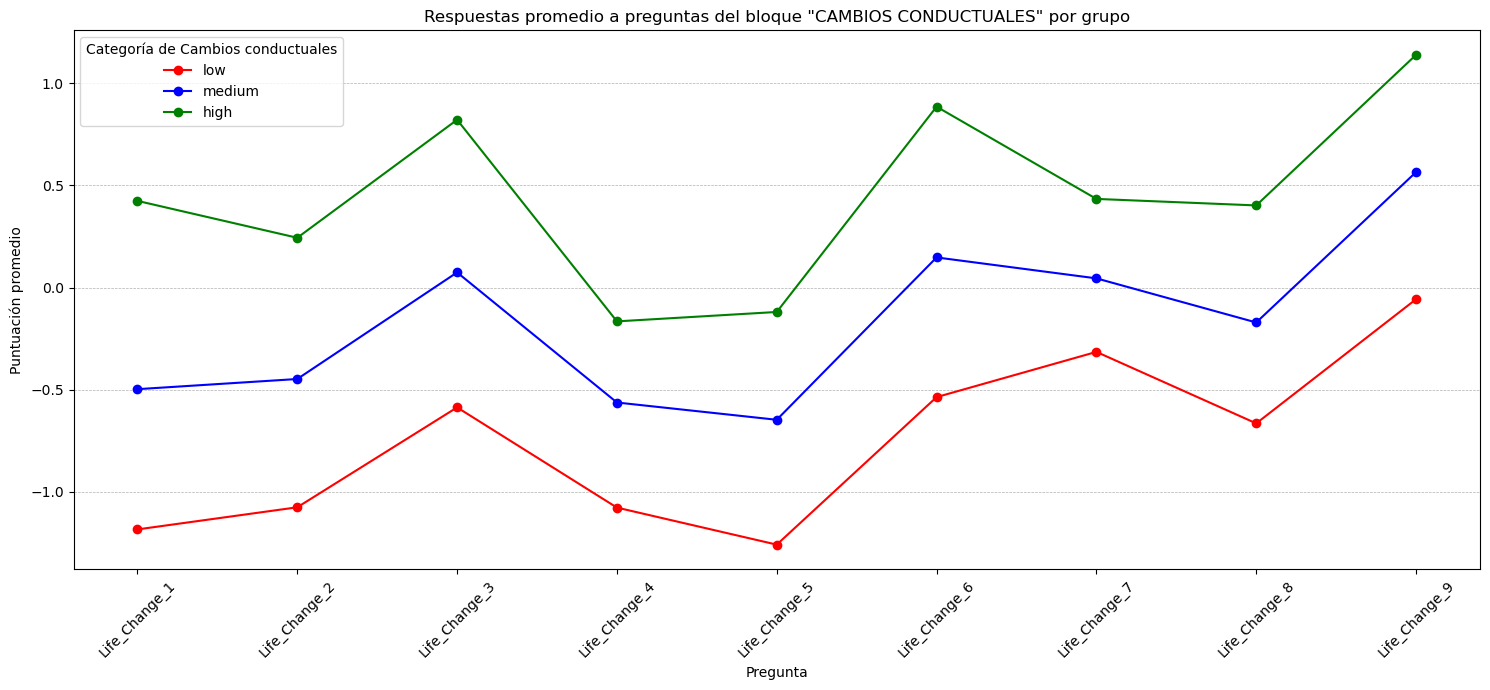

,Life_Change_1,Life_Change_2,Life_Change_3,Life_Change_4,Life_Change_5,Life_Change_6,Life_Change_7,Life_Change_8,Life_Change_9
label_change,,,,,,,,,
low,-1.183623,-1.075335,-0.586462,-1.076844,-1.258135,-0.536090,-0.314748,-0.664712,-0.056853
medium,-0.497212,-0.447481,0.074251,-0.562494,-0.647030,0.147532,0.045126,-0.170805,0.565299
high,0.424327,0.243755,0.821368,-0.165414,-0.119371,0.885359,0.433988,0.402094,1.139219


In [18]:
# Calculamos nuevamente los valores medios para cada variable en cada grupo
grouped_means = df.groupby('label_change')[['Life_Change_1', 'Life_Change_2', 'Life_Change_3', 'Life_Change_4', 
                                         'Life_Change_5', 'Life_Change_6', 'Life_Change_7', 'Life_Change_8', 
                                         'Life_Change_9']].mean()
colors = {
    "low": "red",
    "medium": "blue",
    "high": "green"
}

# Gráfica de líneas con las respuestas promedio a lo largo de las preguntas para cada grupo
plt.figure(figsize=(15, 7))

# Dibujar cada grupo con su respectivo color
for group in grouped_means.index:
    plt.plot(grouped_means.columns, grouped_means.loc[group], marker='o', label=group, color=colors[group])

plt.title('Respuestas promedio a preguntas del bloque "CAMBIOS CONDUCTUALES" por grupo')
plt.ylabel('Puntuación promedio')
plt.xlabel('Pregunta')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Categoría de Cambios conductuales')
plt.show()

# Mostrar la tabla en formato de dataframe
df_grouped_means = pd.DataFrame(grouped_means)
df_grouped_means



# respuestas promedio a las preguntas del bloque "CAMBIOS CONDUCTUALES" para cada grupo 

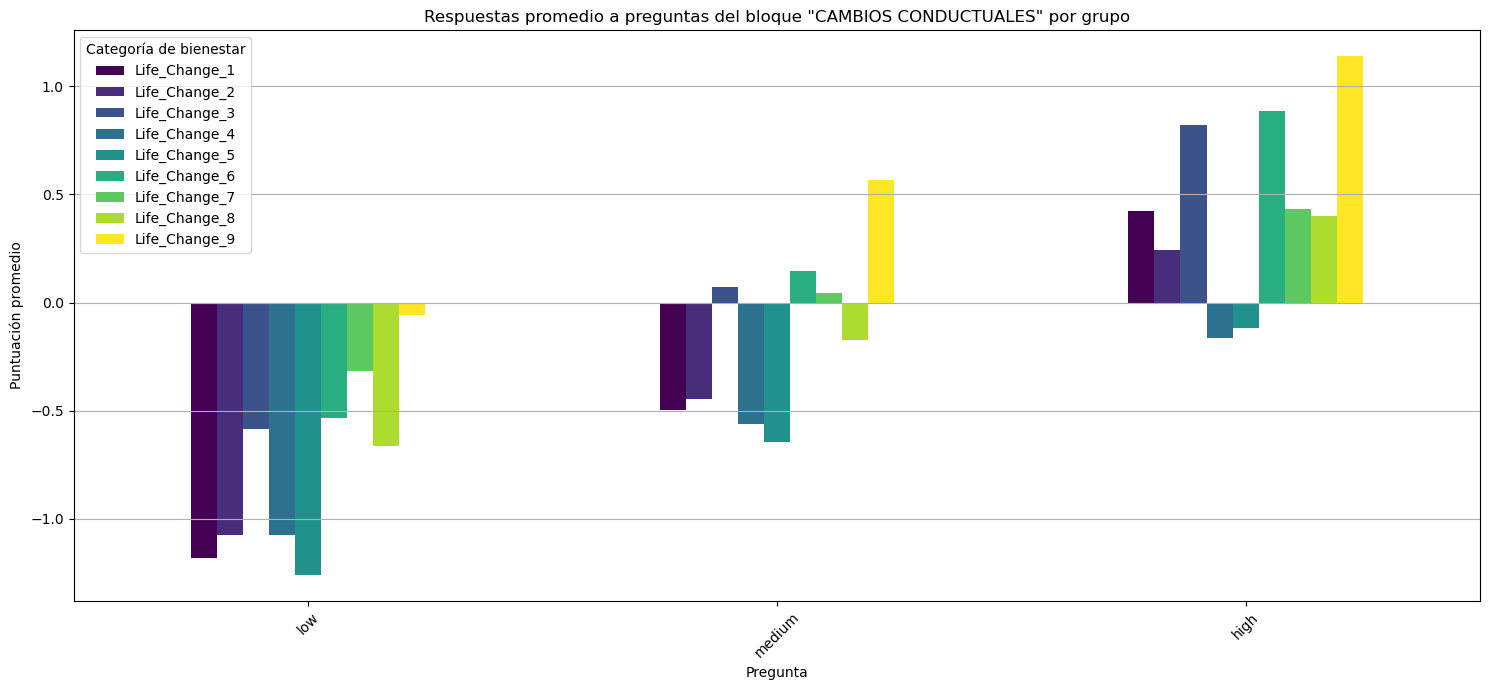

label_change,low,medium,high
Life_Change_1,-1.183623,-0.497212,0.424327
Life_Change_2,-1.075335,-0.447481,0.243755
Life_Change_3,-0.586462,0.074251,0.821368
Life_Change_4,-1.076844,-0.562494,-0.165414
Life_Change_5,-1.258135,-0.647030,-0.119371
Life_Change_6,-0.536090,0.147532,0.885359
Life_Change_7,-0.314748,0.045126,0.433988
Life_Change_8,-0.664712,-0.170805,0.402094
Life_Change_9,-0.056853,0.565299,1.139219


In [33]:
# Determinar los percentiles 33 y 66
percentile_33 = np.percentile(df['total_score'], 33)
percentile_66 = np.percentile(df['total_score'], 66)

# Asignar categorías basadas en los percentiles
df['wellbeing_category'] = pd.cut(df['total_score'], bins=[-np.inf, percentile_33, percentile_66, np.inf], labels=['low', 'medium', 'high'])

# Ahora, agrupamos por la categoría de bienestar basada en percentiles y calculamos la media de las respuestas para el primer bloque
grouped_mean = df.groupby('label_change')[['Life_Change_1', 'Life_Change_2', 'Life_Change_3', 'Life_Change_4', 
                                         'Life_Change_5', 'Life_Change_6', 'Life_Change_7', 'Life_Change_8', 
                                         'Life_Change_9']].mean()

# Visualizamos los resultados en una tabla
grouped_mean_display = grouped_mean.T

# Gráfico
grouped_mean.plot(kind='bar', figsize=(15, 7), colormap='viridis')
plt.title('Respuestas promedio a preguntas del bloque "CAMBIOS CONDUCTUALES" por grupo')
plt.ylabel('Puntuación promedio')
plt.xlabel('Pregunta')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Categoría de bienestar')
plt.show()

grouped_mean_display

## Observaciones:

1. __Actividad Física (Life_Change_1)__: Las personas en el grupo de "cambio bajo" tuvieron una disminución significativa en su actividad física, mientras que aquellos en el grupo de "cambio alto" experimentaron un aumento.

1. __Hábitos de Sueño (Life_Change_2)__: Similar a la actividad física, las personas en el grupo de "cambio bajo" tuvieron una disminución en la calidad de sus hábitos de sueño, mientras que aquellos en "cambio alto" tuvieron un ligero aumento.

1. __Alimentación (Life_Change_3)__: Aquí, el grupo de "cambio alto" experimentó un aumento considerable en la calidad de su alimentación, mientras que el grupo de "cambio bajo" tuvo una disminución.

1. __Ingresos Económicos (Life_Change_4) y Actividad Laboral (Life_Change_5)__: Estas dos categorías muestran una tendencia similar. El grupo de "cambio bajo" experimentó una disminución significativa en ambos aspectos, posiblemente indicando desempleo o reducciones salariales. El grupo de "cambio medio" también experimentó disminuciones, pero no tan pronunciadas. El grupo de "cambio alto", aunque no experimentó mejoras, tuvo impactos menos negativos.

1. __Relaciones con Familia (Life_Change_6)__: El grupo de "cambio alto" experimentó mejoras en sus relaciones familiares, mientras que el grupo de "cambio bajo" tuvo deterioros.

1. __Relaciones con Vecinos (Life_Change_7) y Amigos (Life_Change_8)__: Aquí, vemos una tendencia similar en ambos grupos. El grupo de "cambio alto" tuvo mejoras en ambas categorías, mientras que el grupo de "cambio bajo" tuvo deterioros.

1. __Pasatiempos (Life_Change_9)__: Las personas en el grupo de "cambio alto" tuvieron un aumento considerable en la calidad y cantidad de sus pasatiempos, mientras que el grupo de "cambio bajo" tuvo una ligera disminución.

# Comparación de respuestas promedio: Clusters vs Percentiles

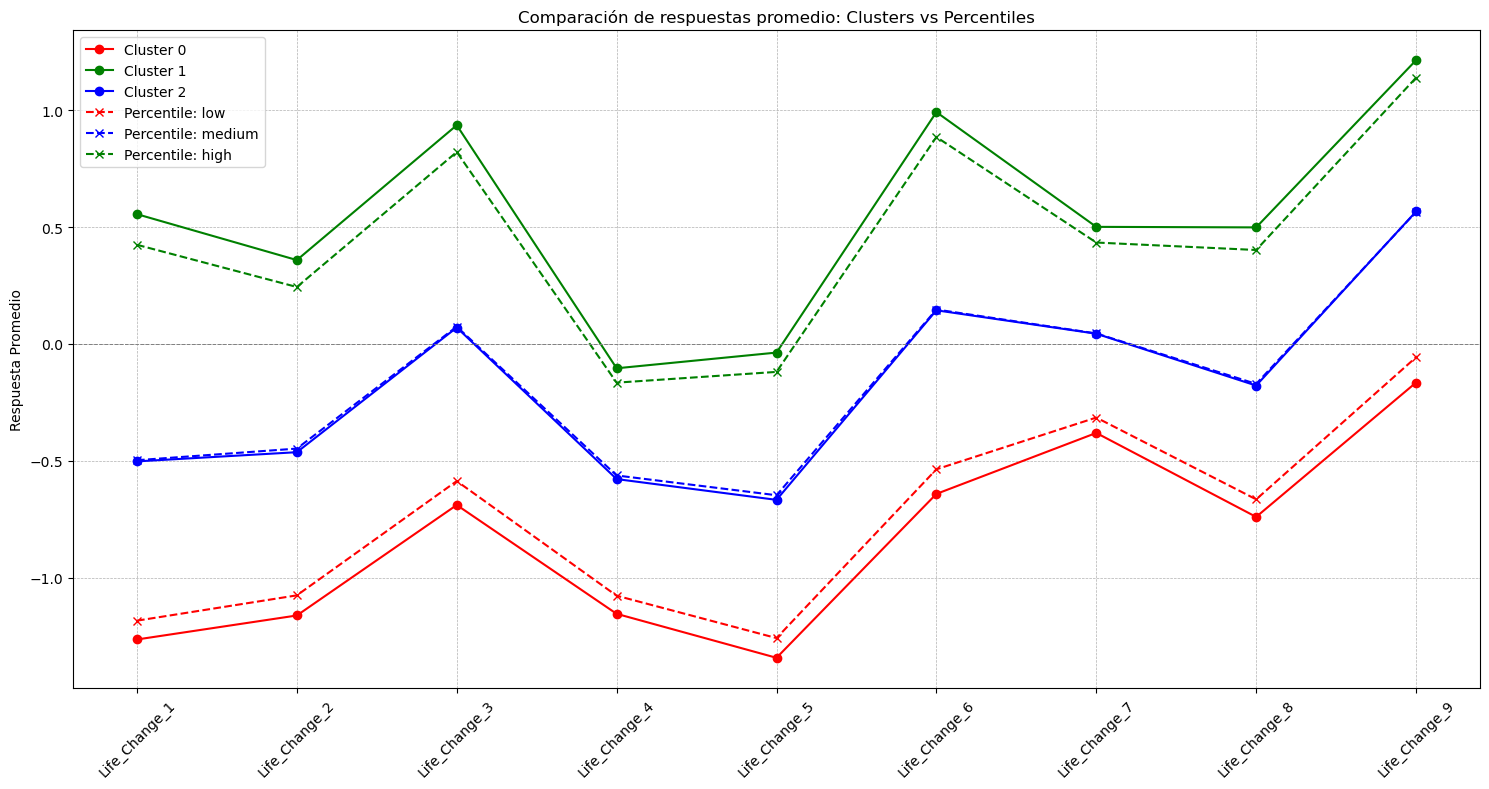

In [20]:
import matplotlib.pyplot as plt

# Calcular la media de las respuestas de las preguntas del primer bloque para cada clúster
cluster_means = df.groupby('cluster_score_label')[['Life_Change_1', 'Life_Change_2', 'Life_Change_3', 'Life_Change_4', 
                                         'Life_Change_5', 'Life_Change_6', 'Life_Change_7', 'Life_Change_8', 
                                         'Life_Change_9']].mean()

# Calculamos nuevamente los valores medios para cada variable en cada grupo de percentiles
grouped_means = df.groupby('label_change')[['Life_Change_1', 'Life_Change_2', 'Life_Change_3', 'Life_Change_4', 
                                         'Life_Change_5', 'Life_Change_6', 'Life_Change_7', 'Life_Change_8', 
                                         'Life_Change_9']].mean()

# Mapeo de colores
colors = {
    "low": "red",
    "medium": "blue",
    "high": "green"
}

# Visualizar las respuestas promedio para cada clúster y cada grupo de percentiles en un gráfico
plt.figure(figsize=(15, 8))

# Gráfica basada en k-means
for cluster, color in zip(cluster_means.index, ['red', 'green', 'blue']):
    plt.plot(cluster_means.columns, cluster_means.loc[cluster], color=color, marker='o', label=f'Cluster {cluster}')

# Gráfica basada en percentiles
for group in grouped_means.index:
    plt.plot(grouped_means.columns, grouped_means.loc[group], linestyle='--', marker='x', label=f'Percentile: {group}', color=colors[group])

plt.title('Comparación de respuestas promedio: Clusters vs Percentiles')
plt.xticks(rotation=45)
plt.ylabel('Respuesta Promedio')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)  # línea de referencia para el valor "igual"
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


## Diferencias observadas en el dataframe df:

* La categorización basada en percentiles dividirá el dataset en tercios aproximadamente iguales. En cambio, K-means podría producir clusters de diferentes tamaños, ya que se basa en la estructura subyacente de los datos.
* En este análisis, aunque ambos enfoques identificaron grupos similares, las asignaciones exactas y las proporciones de individuos en cada grupo difieren.

## Observación general:
Si el objetivo es entender la estructura subyacente de los datos y se busca una segmentación que refleje las tendencias naturales, el clustering con K-means sería el enfoque recomendado. Por otro lado, si se desea una segmentación más uniforme y determinista, la categorización basada en percentiles sería más adecuada.

# <span style="color:red">__Métrica compuesta de "Transformación Positiva" durante la pandemia__</span>

La idea es sumar el inverso del score de "CAMBIOS CONDUCTUALES" al score de "Crecimiento post-traumático" para medir la transformación del individuo.
Se considera que, al sumar el inverso de "CAMBIOS CONDUCTUALES", se está dando más peso a aquellos individuos que han tenido menos cambios conductuales negativos (o, en otras palabras, han mantenido una mayor estabilidad). Al mismo tiempo, al sumar el score de "Crecimiento post-traumático", estás dando más peso a aquellos que han experimentado un crecimiento personal positivo a pesar de la crisis.

Analizando separadamemte:

1. __Inverso de "CAMBIOS CONDUCTUALES"__:

* Suponiendo que los valores negativos en este bloque representan cambios conductuales desfavorables (como menor actividad física, peores hábitos de sueño, etc.), invertir estos valores significa que estás tratando de capturar la "estabilidad" o la "resiliencia" del individuo durante la pandemia.
*  Aquellos con menos cambios desfavorables o incluso con cambios favorables tendrán un score más alto en esta métrica invertida.

2. __Score de "Crecimiento post-traumático"__:

* Aquí, los valores más altos ya representan una mayor adaptación y crecimiento personal a raíz de la crisis.
* Se está reconociendo y dando valor a aquellos que han encontrado maneras de crecer y adaptarse positivamente a pesar de los desafíos.
Al sumar estas dos métricas, básicamente se está creando una métrica compuesta de <span style="color:blue">__"Transformación Positiva"__</span> o <span style="color:blue">__"Crecimiento post traumático"__</span> durante la pandemia. Los individuos con valores más altos en esta métrica compuesta habrán experimentado menos cambios conductuales negativos y más crecimiento post-traumático.

In [35]:
# Calculando el score de transformación
df['transform_score'] = (1 / (df['block1_score'] + 2.1)) + df['block2_score']

df['transform_score'].head()

df.head()

,Life_Change_1,Life_Change_2,Life_Change_3,Life_Change_4,Life_Change_5,Life_Change_6,Life_Change_7,Life_Change_8,Life_Change_9,Growth_1,...,Growth_3,Growth_4,Growth_5,total_score,label_change,cluster_score_label,wellbeing_category,block1_score,block2_score,transform_score
0,-2.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,3.0,...,3.0,2.0,3.0,2.0,high,1,high,2.0,14.0,14.243902
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,...,3.0,3.0,3.0,18.0,high,1,high,18.0,15.0,15.049751
2,-1.0,0.0,2.0,0.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,...,2.0,3.0,3.0,0.0,medium,2,medium,0.0,11.0,11.476190
3,2.0,0.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,...,2.0,1.0,3.0,10.0,high,1,high,10.0,9.0,9.082645
4,0.0,-1.0,2.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,...,3.0,3.0,3.0,7.0,high,1,high,7.0,12.0,12.109890


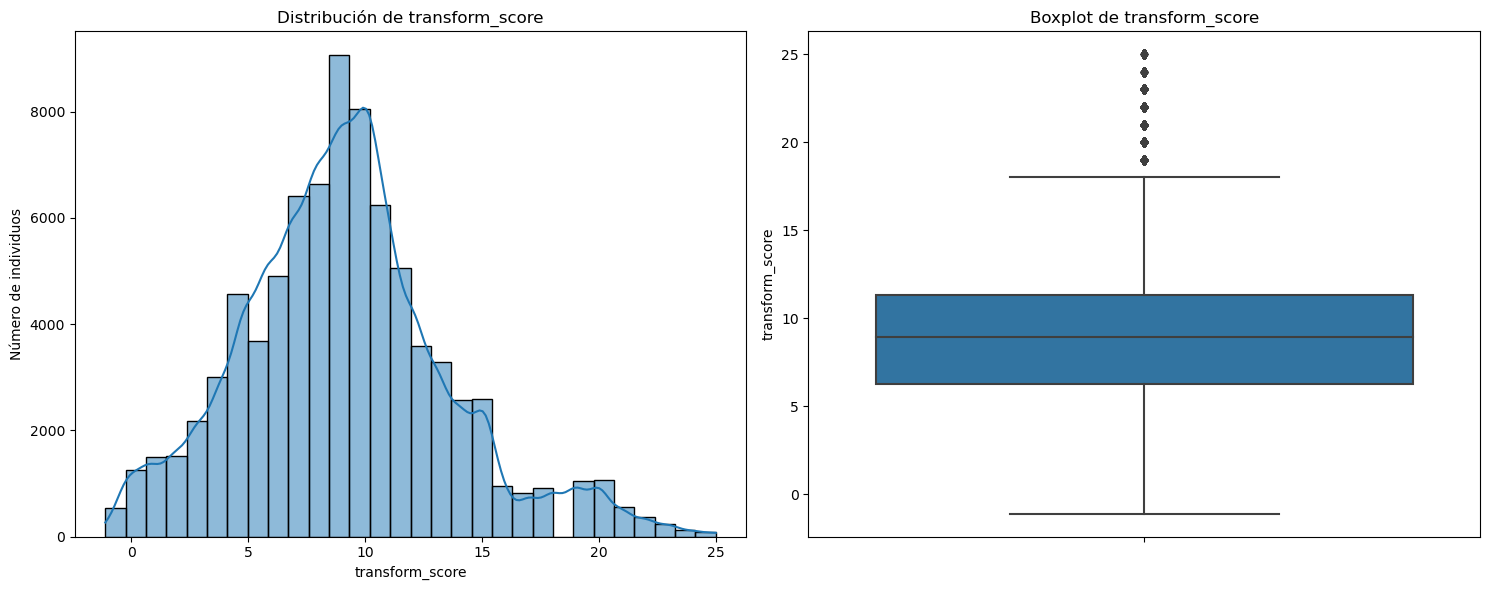

count    82776.000000
mean         9.118126
std          4.451809
min         -1.111111
25%          6.243902
50%          8.909091
75%         11.322581
max         25.000000
Name: transform_score, dtype: float64

In [38]:
import seaborn as sns
# Estadísticas descriptivas
desc_stats = df['transform_score'].describe()

# Histograma y boxplot
plt.figure(figsize=(15, 6))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(df['transform_score'], kde=True, bins=30)
plt.title('Distribución de transform_score')
plt.xlabel('transform_score')
plt.ylabel('Número de individuos')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['transform_score'])
plt.title('Boxplot de transform_score')
plt.ylabel('transform_score')

plt.tight_layout()
plt.show()

desc_stats

# Análisis de cluster
El método del codo muestra que la inercia (una medida de la variación total dentro de los clusters) disminuye a medida que aumenta el número de clusters. Se busca el "codo" en la gráfica, que es el punto donde la tasa de disminución de la inercia comienza a nivelarse.

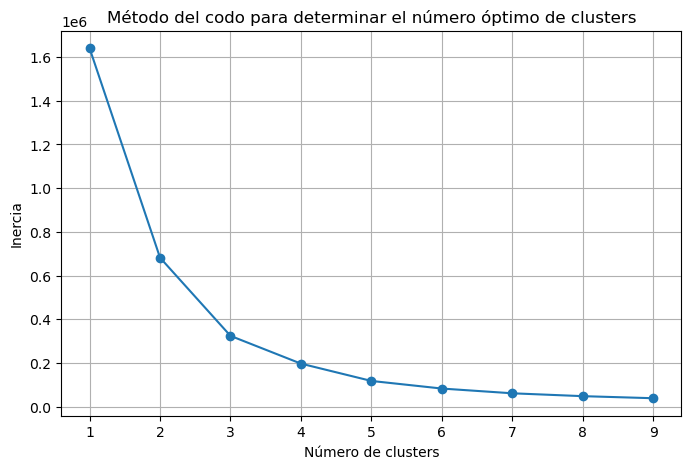

In [36]:
# Determinar el número óptimo de clusters usando el método del codo
inertia = []
possible_k_values = range(1, 10)

# Calculamos la inercia para diferentes valores de k
for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['transform_score']])
    inertia.append(kmeans.inertia_)
    
# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(possible_k_values, inertia, '-o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo para determinar el número óptimo de clusters')
plt.grid(True)
plt.show()

En la gráfica, parece que el codo se encuentra en $k=3$ o $k=4$. Sin embargo, $k=3$ parece ser una buena elección porque después de ese punto, el cambio en la inercia comienza a ser menos pronunciado.

A continuación, se aplica k-means con $k=3$ para segmentar a los individuos en base a la variable transform_score. Luego se verá los resultados.

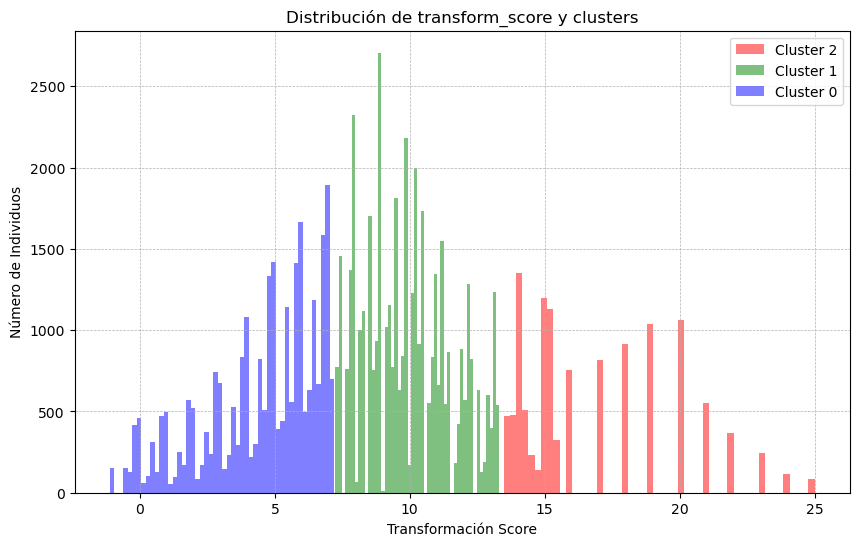

In [39]:
# Aplicar K-means con k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df['transform_cluster'] = kmeans.fit_predict(df[['transform_score']])

# Visualizar la distribución de los transform_score y los clusters
plt.figure(figsize=(10, 6))
for cluster, color in zip(df['transform_cluster'].unique(), ['red', 'green', 'blue']):
    subset = df[df['transform_cluster'] == cluster]
    plt.hist(subset['transform_score'], bins=50, alpha=0.5, label=f'Cluster {cluster}', color=color)
    
plt.title('Distribución de transform_score y clusters')
plt.xlabel('Transformación Score')
plt.ylabel('Número de Individuos')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Parece que se ha encontrado tres clusters claros utilizando k-means. Estos clusters representan diferentes niveles de transformación en los individuos:

* __Cluster 0 (Rojo)__: Representa a individuos con scores de transformación __altos__, lo que indica que han tenido menos cambios conductuales negativos y más crecimiento post-traumático.
* __Cluster 1 (Verde)__: Representa a individuos con scores de transformación intermedios.
* __Cluster 2 (Azul)__: Representa a individuos con scores de transformación __bajos__, lo que indica que han tenido más cambios conductuales negativos y menos crecimiento post-traumático.

A partir de esta segmentación, es evidente que la variable `transform_score` puede ser útil para clasificar a los individuos en diferentes niveles de transformación. Estos clusters pueden proporcionar entendimiento sobre cómo la pandemia ha afectado a diferentes grupos de personas y ayudar a diseñar intervenciones o programas específicos para cada grupo.

In [43]:
# Corrección de los nombres de las columnas para el segundo bloque
block2_columns = ['Growth_1', 'Growth_2', 'Growth_3', 'Growth_4', 'Growth_5']

# Calculamos el 'transform_score' nuevamente
df['block1_score'] = df[['Life_Change_1', 'Life_Change_2', 'Life_Change_3', 'Life_Change_4', 
                         'Life_Change_5', 'Life_Change_6', 'Life_Change_7', 'Life_Change_8', 
                         'Life_Change_9']].sum(axis=1)

df['block2_score'] = df[block2_columns].sum(axis=1)

# Calculamos el score de transformación
df['transform_score'] = (1 / (df['block1_score'] + 2.1)) + df['block2_score']


# Etiquetar cada individuo basado en la variable 'transform_score' usando percentiles
labels = ['low', 'medium', 'high']
df['label_transform'] = pd.qcut(df['transform_score'], q=3, labels=labels)

df.head()

,Life_Change_1,Life_Change_2,Life_Change_3,Life_Change_4,Life_Change_5,Life_Change_6,Life_Change_7,Life_Change_8,Life_Change_9,Growth_1,...,Growth_5,total_score,label_change,cluster_score_label,wellbeing_category,block1_score,block2_score,transform_score,transform_cluster,label_transform
0,-2.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,3.0,...,3.0,2.0,high,1,high,2.0,14.0,14.243902,2,high
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,...,3.0,18.0,high,1,high,18.0,15.0,15.049751,2,high
2,-1.0,0.0,2.0,0.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,...,3.0,0.0,medium,2,medium,0.0,11.0,11.476190,1,high
3,2.0,0.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,...,3.0,10.0,high,1,high,10.0,9.0,9.082645,1,medium
4,0.0,-1.0,2.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,...,3.0,7.0,high,1,high,7.0,12.0,12.109890,1,high


In [44]:
# Filtrar los individuos que tienen el score máximo en ambos bloques y mostrar las primeras 5 filas completas
top_transformed_individuals = df[(df['block1_score'] == df['block1_score'].max()) & 
                                (df['block2_score'] == df['block2_score'].max())]
top_transformed_individuals.head(5)

,Life_Change_1,Life_Change_2,Life_Change_3,Life_Change_4,Life_Change_5,Life_Change_6,Life_Change_7,Life_Change_8,Life_Change_9,Growth_1,...,Growth_5,total_score,label_change,cluster_score_label,wellbeing_category,block1_score,block2_score,transform_score,transform_cluster,label_transform
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,...,3.0,18.0,high,1,high,18.0,15.0,15.049751,2,high
51,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,...,3.0,18.0,high,1,high,18.0,15.0,15.049751,2,high
105,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,...,3.0,18.0,high,1,high,18.0,15.0,15.049751,2,high
163,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,...,3.0,18.0,high,1,high,18.0,15.0,15.049751,2,high
526,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,...,3.0,18.0,high,1,high,18.0,15.0,15.049751,2,high


In [45]:
# Identificando los individuos con el score más bajo en "CAMBIOS CONDUCTUALES" y el score más alto en "Crecimiento post-traumático"
lowest_conductual = df['block1_score'].min()
highest_growth = df['block2_score'].max()

# Filtrando los individuos que cumplen con las condiciones
selected_individuals = df[(df['block1_score'] == lowest_conductual) & (df['block2_score'] == highest_growth)]

# Mostrando los primeros 5 individuos que cumplen con las condiciones
selected_individuals.head()

,Life_Change_1,Life_Change_2,Life_Change_3,Life_Change_4,Life_Change_5,Life_Change_6,Life_Change_7,Life_Change_8,Life_Change_9,Growth_1,...,Growth_5,total_score,label_change,cluster_score_label,wellbeing_category,block1_score,block2_score,transform_score,transform_cluster,label_transform
8299,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,3.0,...,3.0,-18.0,low,0,low,-18.0,15.0,14.937107,2,high
54742,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,3.0,...,3.0,-18.0,low,0,low,-18.0,15.0,14.937107,2,high
57136,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,3.0,...,3.0,-18.0,low,0,low,-18.0,15.0,14.937107,2,high
57726,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,3.0,...,3.0,-18.0,low,0,low,-18.0,15.0,14.937107,2,high
61022,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,3.0,...,3.0,-18.0,low,0,low,-18.0,15.0,14.937107,2,high


In [46]:
# Filtrar individuos con el score de cambios conductuales más bajo y el de crecimiento post-traumático más bajo
worst_transform_individuals = df[(df['block1_score'] == df['block1_score'].min()) & 
                                 (df['block2_score'] == df['block2_score'].min())]

# Mostrar los primeros 5 individuos
worst_transform_individuals.head(5)

,Life_Change_1,Life_Change_2,Life_Change_3,Life_Change_4,Life_Change_5,Life_Change_6,Life_Change_7,Life_Change_8,Life_Change_9,Growth_1,...,Growth_5,total_score,label_change,cluster_score_label,wellbeing_category,block1_score,block2_score,transform_score,transform_cluster,label_transform
168,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,...,0.0,-18.0,low,0,low,-18.0,0.0,-0.062893,0,low
229,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,...,0.0,-18.0,low,0,low,-18.0,0.0,-0.062893,0,low
252,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,...,0.0,-18.0,low,0,low,-18.0,0.0,-0.062893,0,low
439,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,...,0.0,-18.0,low,0,low,-18.0,0.0,-0.062893,0,low
638,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0.0,...,0.0,-18.0,low,0,low,-18.0,0.0,-0.062893,0,low


In [47]:
# Filtrando los individuos que tienen el score de cambios conductuales más alto y el score de crecimiento post-traumático más bajo
highest_conductual_lowest_growth = df[(df['block1_score'] == df['block1_score'].max()) & 
                                     (df['block2_score'] == df['block2_score'].min())]

# Mostrando los primeros 5 individuos que cumplen con la condición
highest_conductual_lowest_growth.head(5)

,Life_Change_1,Life_Change_2,Life_Change_3,Life_Change_4,Life_Change_5,Life_Change_6,Life_Change_7,Life_Change_8,Life_Change_9,Growth_1,...,Growth_5,total_score,label_change,cluster_score_label,wellbeing_category,block1_score,block2_score,transform_score,transform_cluster,label_transform
3157,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,...,0.0,18.0,high,1,high,18.0,0.0,0.049751,0,low
5064,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,...,0.0,18.0,high,1,high,18.0,0.0,0.049751,0,low
11387,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,...,0.0,18.0,high,1,high,18.0,0.0,0.049751,0,low
60590,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,...,0.0,18.0,high,1,high,18.0,0.0,0.049751,0,low
